In [5]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [10]:
data = pd.read_csv("C:\\Users\\Simon\\PycharmProjects\\NeuronaleNetze\\data\\houses.csv")
data = data.sample(frac = 1)
data.columns = data.columns.astype(str)

data = data.drop("id", axis=1)
data = data.drop("lat", axis=1)
data = data.drop("long", axis=1)
data = data.drop("condition", axis=1)
data = data.drop("grade", axis=1)
data = data.drop("date", axis=1)
data = data.drop("zipcode", axis=1)

#Splitting

y = data["price"]
X = data.drop("price", axis=1)

st = StandardScaler()
X = st.fit_transform(X)

#Scaling and Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(17290, 13)


In [21]:
#ML
model = Sequential()
model.add(Dense(units=8, input_shape=(13,), activation="relu"))
model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=1))

model.compile(loss="mean_squared_error", optimizer="adam", metrics="mean_absolute_error")

history = model.fit(X_train,y_train,epochs=1000,batch_size=64,validation_split=0.1)

_,loss = model.evaluate(X_test,y_test)
print('Mean Absolute Error: %.2f' % (loss))

Epoch 1/1000
244/244 [==============================] - 1s 2ms/step - loss: 416431800320.0000 - mean_absolute_error: 538331.0625 - val_loss: 498689474560.0000 - val_mean_absolute_error: 549370.8125
Epoch 2/1000
244/244 [==============================] - 0s 2ms/step - loss: 416394444800.0000 - mean_absolute_error: 538304.0000 - val_loss: 498606276608.0000 - val_mean_absolute_error: 549318.6875
Epoch 3/1000
244/244 [==============================] - 0s 1ms/step - loss: 416267862016.0000 - mean_absolute_error: 538214.2500 - val_loss: 498393907200.0000 - val_mean_absolute_error: 549184.9375
Epoch 4/1000
244/244 [==============================] - 0s 2ms/step - loss: 416004767744.0000 - mean_absolute_error: 538026.7500 - val_loss: 498003279872.0000 - val_mean_absolute_error: 548938.9375
Epoch 5/1000
244/244 [==============================] - 0s 1ms/step - loss: 415562268672.0000 - mean_absolute_error: 537714.3125 - val_loss: 497392549888.0000 - val_mean_absolute_error: 548554.6875
Epoch 6/10

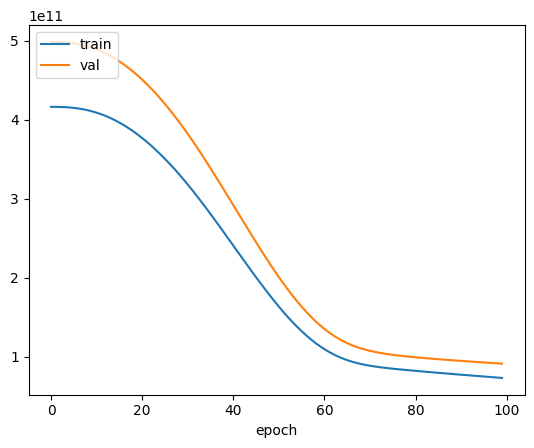

In [20]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()